# Paso 1: Generar datos y análisis exploratorio inicial

Datos de Pronóstico de Demanda:
         Month  Demand_Forecast
0        Enero              136
1      Febrero              256
2        Marzo              298
3        Abril              184
4         Mayo              441
5        Junio              292
6        Julio              199
7       Agosto              381
8   Septiembre              415
9      Octubre              124
10   Noviembre              352
11   Diciembre              222

Datos de Capacidad de Producción:
         Month  Capacity
0        Enero       242
1      Febrero       297
2        Marzo       151
3        Abril       162
4         Mayo       155
5        Junio       334
6        Julio       366
7       Agosto       300
8   Septiembre       186
9      Octubre       292
10   Noviembre       295
11   Diciembre       339


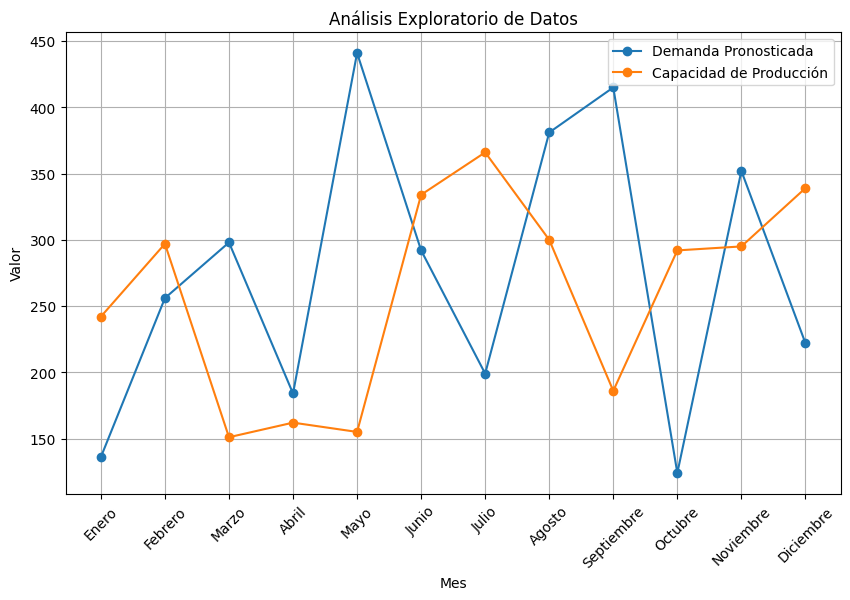

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuramos Faker para datos de fechas
fake = Faker('es_ES')

# Generamos datos simulados para la demanda histórica y la capacidad de producción
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
demand_data = {'Month': months, 'Demand_Forecast': np.random.randint(100, 500, size=len(months))}
production_data = {'Month': months, 'Capacity': np.random.randint(100, 400, size=len(months))}

# Convertimos los datos a DataFrames de pandas
demand_forecast_df = pd.DataFrame(demand_data)
production_capacity_df = pd.DataFrame(production_data)

# Visualizamos los datos generados
print("Datos de Pronóstico de Demanda:")
print(demand_forecast_df)
print("\nDatos de Capacidad de Producción:")
print(production_capacity_df)

# Realizamos un análisis exploratorio de los datos
plt.figure(figsize=(10, 6))
plt.plot(demand_forecast_df['Month'], demand_forecast_df['Demand_Forecast'], marker='o', label='Demanda Pronosticada')
plt.plot(production_capacity_df['Month'], production_capacity_df['Capacity'], marker='o', label='Capacidad de Producción')
plt.title('Análisis Exploratorio de Datos')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

  Los anteriores son datos simulados para la demanda histórica y la capacidad de producción, los convertimos en DataFrames de pandas y realizamos un análisis exploratorio inicial mostrando las tendencias de ambas variables a lo largo de los meses.

# Paso 2: Modelado y predicción de la demanda

Métricas de Evaluación:
Error Cuadrático Medio (MSE): 19296.77249851752
Coeficiente de Determinación (R²): -0.7580878734072085


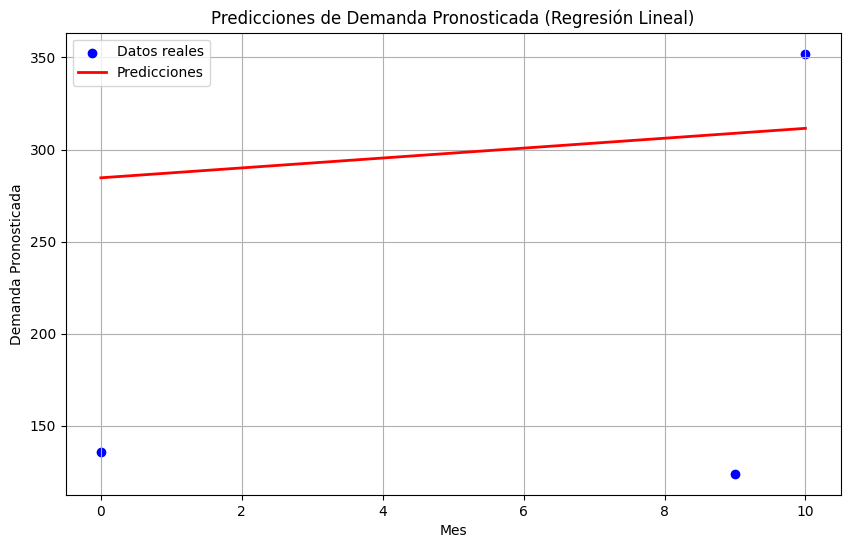

In [2]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X = np.array(range(len(months))).reshape(-1, 1)  # Mes como característica
y = demand_forecast_df['Demand_Forecast'].values  # Demanda pronosticada como variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calculamos métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Métricas de Evaluación:")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Predicciones de Demanda Pronosticada (Regresión Lineal)')
plt.xlabel('Mes')
plt.ylabel('Demanda Pronosticada')
plt.legend()
plt.grid(True)
plt.show()

entrenamos un modelo de regresión lineal utilizando los datos de entrenamiento y realizamos predicciones sobre el conjunto de prueba. Luego, calculamos las métricas de evaluación (MSE y R²) y visualizamos las predicciones en comparación con los datos reales.

# Paso 3: Integramos en el proceso de S&OP

Para simular una reunión de S&OP, ajustaremos el plan de producción en función de las predicciones de demanda. En este caso, supongamos que queremos mantener un inventario de seguridad del 10% en relación con la demanda pronosticada.

In [3]:
# Calculamos la demanda pronosticada para los próximos meses
future_months = np.array(range(len(months), len(months) + 3)).reshape(-1, 1)  # Meses futuros
future_demand = model.predict(future_months)

# Ajustamos el plan de producción (suponiendo un inventario de seguridad del 10%)
adjusted_production_plan = future_demand * 1.1

print("Plan de Producción Ajustado:")
for month, demand in zip(range(len(months), len(months) + 3), adjusted_production_plan):
    print(f"Mes {month + 1}: {demand}")

Plan de Producción Ajustado:
Mes 13: 348.55712290502794
Mes 14: 351.5114525139665
Mes 15: 354.46578212290507


Utilizamos el modelo entrenado para predecir la demanda de los próximos 3 meses. Luego, ajustamos el plan de producción agregando un 10% de inventario de seguridad a cada predicción de demanda. Por último, mostramos el plan de producción ajustado para los próximos meses.

# Paso 4: Analizamos los resultados y tomamos decisiones

En este paso, analizaremos los resultados de la simulación de S&OP y tomaremos decisiones estratégicas basadas en el análisis de datos y las predicciones de demanda.

Por ejemplo, podríamos evaluar si el plan de producción ajustado cumple con los requisitos de capacidad de producción y si el inventario de seguridad es adecuado para mitigar el riesgo de escasez de productos. Además, podríamos considerar ajustes adicionales en el plan de producción en función de otros factores, como la disponibilidad de materias primas o la capacidad logística.

In [4]:
# Evaluamos el plan de producción ajustado
production_capacity = production_capacity_df['Capacity'].values[-1]  # Último mes de capacidad de producción
total_demand = np.sum(adjusted_production_plan)

print(f"Capacidad de Producción: {production_capacity}")
print(f"Demanda Total: {total_demand}")

if total_demand <= production_capacity:
    print("El plan de producción ajustado cumple con la capacidad de producción.")
else:
    print("El plan de producción ajustado excede la capacidad de producción. Se requieren ajustes adicionales.")

# Tomamos decisiones estratégicas
if total_demand <= production_capacity:
    print("No se requieren ajustes adicionales en el plan de producción.")
    print("El plan de producción ajustado es adecuado para satisfacer la demanda prevista.")
else:
    print("Se requieren ajustes adicionales en el plan de producción para cumplir con la demanda prevista.")
    # Aquí podríamos incluir lógica para ajustar el plan de producción en función de la capacidad disponible y otros factores.

Capacidad de Producción: 339
Demanda Total: 1054.5343575418995
El plan de producción ajustado excede la capacidad de producción. Se requieren ajustes adicionales.
Se requieren ajustes adicionales en el plan de producción para cumplir con la demanda prevista.


 Finalmente, evaluamos si el plan de producción ajustado cumple con la capacidad de producción disponible. Si cumple, indicamos que el plan es adecuado y no se requieren ajustes adicionales. Si el plan excede la capacidad de producción, indicamos que se necesitan ajustes adicionales y podríamos incluir lógica adicional para determinar cómo ajustar el plan en función de los recursos disponibles y otros factores.